# MSA 2023 Phase 2 - Part 2

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report, mean_absolute_error, r2_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

# Classification Model

## 1. Load and split preprocessed data

In [15]:
# Load preprocessed data
market_segmentation = pd.read_csv("../1. Analysis and Preprocessing/preprocessed_datasets/market_segmentation.csv")
market_segmentation.head()

,Age,Family_Size,Segmentation,Graduated_Yes,Ever_Married_Yes,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,0.521127,0.000,A,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0.450704,0.000,A,1,1,0,0,1,1,0,0,0,0,0,0,0,0
2,0.281690,0.250,A,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,1.000000,0.000,A,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,0.267606,0.375,A,1,0,0,0,1,1,0,0,0,0,0,0,0,0


In [17]:
# Load preprocessed data with interaction
market_segmentation_interaction = pd.read_csv("../1. Analysis and Preprocessing/preprocessed_datasets/market_segmentation_interaction.csv")
market_segmentation_interaction.head()

,Age,Family_Size,Segmentation,Graduated_Yes,Ever_Married_Yes,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Profession_Artist,Profession_Doctor,...,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Age_Segment_Adult,Age_Segment_Elderly,Age_Segment_Middle_Aged,Age_Adult,Age_Middle_Aged,Age_Elderly
0,0.521127,0.000,A,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0.000000,0.521127,0.0
1,0.450704,0.000,A,1,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0.000000,0.450704,0.0
2,0.281690,0.250,A,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0.281690,0.000000,0.0
3,1.000000,0.000,A,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0.000000,0.000000,1.0
4,0.267606,0.375,A,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0.267606,0.000000,0.0


In [44]:
# Get the features of the dataset
X_rf = market_segmentation.drop(columns=["Segmentation"])
X_lg = market_segmentation_interaction.drop(columns=["Segmentation"])

# Get the target of the dataset
y = market_segmentation.Segmentation

# Create an 70-30 train-test split on the dataset
X_rf_train, X_rf_test, y_train, y_test = train_test_split(X_rf, y, test_size=0.3, random_state=101)

# Create an 70-30 train-test split on the dataset with interaction
X_lg_train, X_lg_test, y_train, y_test = train_test_split(X_lg, y, test_size=0.3, random_state=101)

## 2. Choose an algorithm

In [45]:
# Load an untuned logistic regression model
lg_model = LogisticRegression()

# Load an untuned random forest classifier model
rf_model = RandomForestClassifier()

## 3. Train and test a model

In [46]:
# Train the logistic regression model using the training set
lg_model.fit(X_lg_train, y_train)

# Get predictions using the features of the test set
lg_predictions = lg_model.predict(X_lg_test)

# Test the model using predictions and the targets of the test set
lg_accuracy = accuracy_score(y_test, lg_predictions)

lg_accuracy

c:\Users\angel\Documents\MSA\2023-Phase-2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5140488254260709

In [47]:
# Train the random forest model using the training set without interaction
rf_model.fit(X_rf_train, y_train)

# Get predictions using the features of the test set
rf_predictions = rf_model.predict(X_rf_test)

# Test the model using predictions and the targets of the test set
rf_accuracy = accuracy_score(y_test, rf_predictions)

rf_accuracy

0.46798710271764166

## 4. Evaluate the model 

### Confusion Matrices

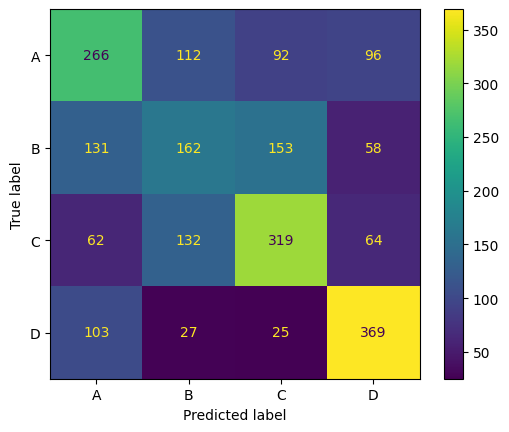

In [48]:
# Evaluate the confusion matrix of the logistic regression model
lg_cm = confusion_matrix(y_test, lg_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=lg_cm, display_labels=lg_model.classes_)
disp.plot()

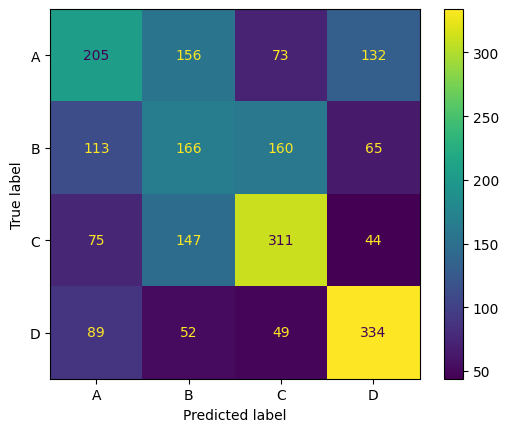

In [49]:
# Evaluate the confusion matrix of the random forest model
rf_cm = confusion_matrix(y_test, rf_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=lg_model.classes_)
disp.plot()

### Classification Metrics

In [50]:
# Evaluate the precision, recall and f1-score for each class of the logistic regression model
pd.DataFrame(classification_report(y_test, lg_predictions, output_dict=True)).drop(columns="accuracy")

,A,B,C,D,macro avg,weighted avg
precision,0.473310,0.374134,0.541596,0.628620,0.504415,0.505921
recall,0.469965,0.321429,0.552860,0.704198,0.512113,0.514049
f1-score,0.471631,0.345784,0.547170,0.664266,0.507213,0.508987
support,566.000000,504.000000,577.000000,524.000000,2171.000000,2171.000000


In [51]:
# Evaluate the precision, recall and f1-score for each class of the random forest model
pd.DataFrame(classification_report(y_test, rf_predictions, output_dict=True)).drop(columns="accuracy")

,A,B,C,D,macro avg,weighted avg
precision,0.425311,0.318618,0.524452,0.580870,0.462313,0.464438
recall,0.362191,0.329365,0.538995,0.637405,0.466989,0.467987
f1-score,0.391221,0.323902,0.531624,0.607825,0.463643,0.465189
support,566.000000,504.000000,577.000000,524.000000,2171.000000,2171.000000


### ROC Curves

In [52]:
# Binarise the target by one-hot-encoding
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

def plot_ovr_roc_curve(model, X_test):
    # Get the class probabilities
    y_score = model.predict_proba(X_test)

    # Create figure
    fig, ax = plt.subplots()

    # Loop through each segmentation class
    for class_of_interest in ["A", "B", "C", "D"]:
        # Get the class id
        class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

        # Display the ROC curve of the class of interest vs the rest of the classes
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"{class_of_interest} vs the rest",
            ax=ax,
        )

    # Plot labels
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("One-vs-Rest ROC curves")
    plt.legend()
    plt.show()

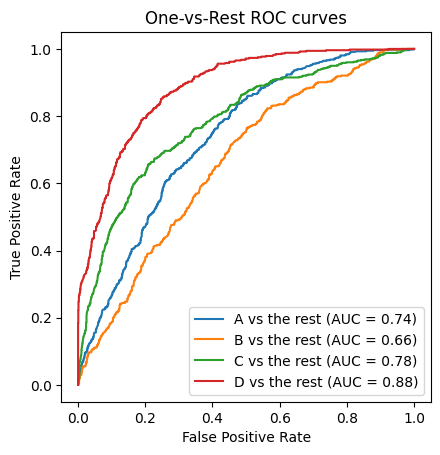

In [53]:
# Plot the OvR ROC curves for the logistic regression model
plot_ovr_roc_curve(lg_model, X_lg_test)

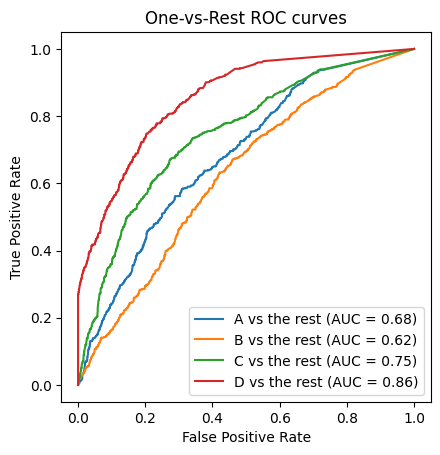

In [54]:
# Plot the OvR ROC curves for the random forest model
plot_ovr_roc_curve(rf_model, X_rf_test)

In [55]:
# Save the logistic regression model
pickle.dump(lg_model, open("outputs/lg-model.pkl", "wb"))

# Save the random forest model
pickle.dump(rf_model, open("outputs/rf-model.pkl", "wb"))

## 5. Summary

# Regression Model

## 1. Load and split preprocessed data

In [22]:
# Load preprocessed data
exam_scores = pd.read_csv("../1. Analysis and Preprocessing/preprocessed_datasets/exam_scores.csv")
exam_scores.head()

,WklyStudyHours,MathScore,ReadingScore,WritingScore,LunchType_standard,TestPrep_none,Gender_male,ParentEduc_associate's degree,ParentEduc_bachelor's degree,ParentEduc_high school,ParentEduc_master's degree,ParentEduc_some college,ParentEduc_some high school,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E
0,0,71,71,74,1,1,0,0,1,0,0,0,0,0,0,0,0,0
1,0,87,93,91,1,1,0,0,0,0,1,0,0,0,1,0,0,0
2,1,45,56,42,0,1,1,1,0,0,0,0,0,1,0,0,0,0
3,1,76,78,75,1,1,1,0,0,0,0,1,0,0,0,1,0,0
4,1,73,84,79,1,1,0,1,0,0,0,0,0,0,1,0,0,0


In [23]:
# Get the features of the dataset
X = exam_scores.drop(columns=["MathScore", "ReadingScore", "WritingScore"])

# Get the target of the dataset
y = exam_scores.MathScore

# Create an 70-30 train-test split on the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 2. Choose an algorithm

In [24]:
# Load an untuned linear regression model
lr_model = LinearRegression()

# Load an untuned support vector machine model
svm_model = SVR()

## 3. Train and test a model

In [25]:
# Train the linear regression model using the training set
lr_model.fit(X_train, y_train)

# Get predictions using the features of the test set
lr_predictions = lr_model.predict(X_test)

# Test the model using predictions and the targets of the test set
lr_mse = mean_squared_error(y_test, lr_predictions)

lr_mse

168.76321727312086

In [26]:
# Train the support vector machine model using the training set
svm_model.fit(X_train, y_train)

# Get predictions using the features of the test set
svm_predictions = svm_model.predict(X_test)

# Test the model using predictions and the targets of the test set
svm_mse = mean_squared_error(y_test, svm_predictions)

svm_mse

170.49564293800876

In [27]:
# Get the coefficients of each feature of the linear regression model
pd.DataFrame({"Feature": X_test.columns, "Coefficient": lr_model.coef_})

,Feature,Coefficient
0,WklyStudyHours,2.220917
1,LunchType_standard,11.970370
2,TestPrep_none,-4.681601
3,Gender_male,5.070708
4,ParentEduc_associate's degree,1.553031
5,ParentEduc_bachelor's degree,3.719002
6,ParentEduc_high school,-2.119574
7,ParentEduc_master's degree,5.865413
8,ParentEduc_some college,-0.373185
9,ParentEduc_some high school,-4.381071


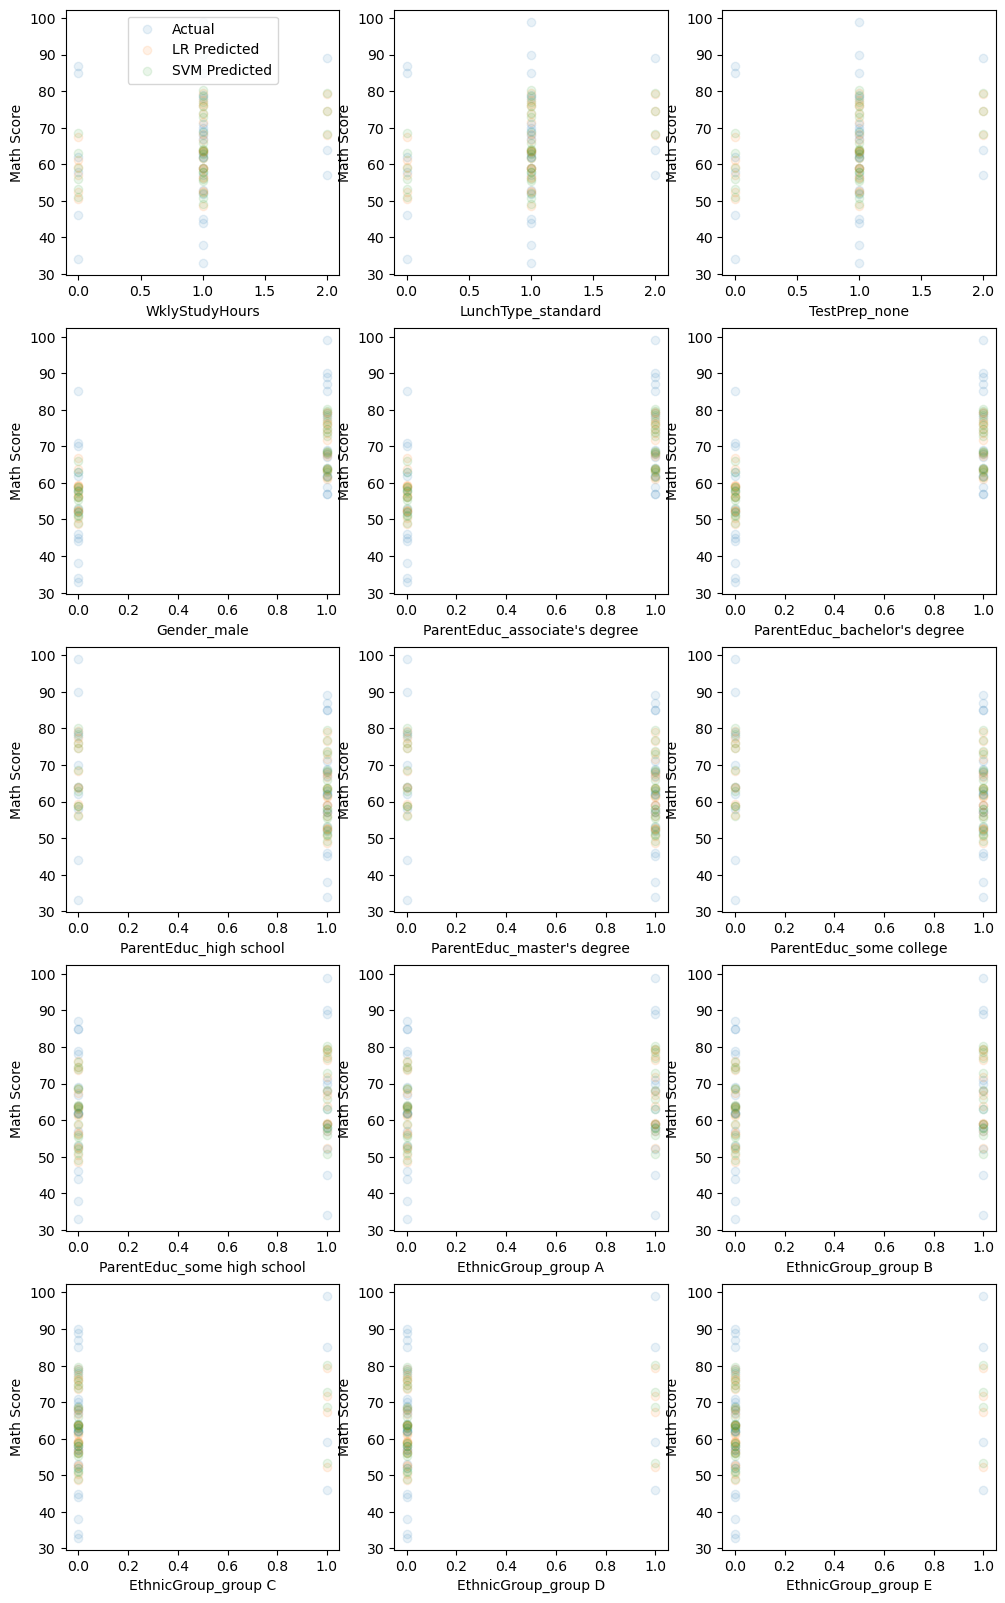

In [28]:
# Create figure
fig, axs = plt.subplots(nrows=5, ncols=3)

# Number of samples to plot
n = 30

# Loop through each set of axes
for i in range(5):
    for j in range(3):
        # Get the feature index
        idx = 3*i+j

        # Plot the actual values
        axs[i][j].scatter(X_test.iloc[:n,i], y_test[:n], alpha=0.1)

        # Plot the predicted values from the linear regression model
        axs[i][j].scatter(X_test.iloc[:n,i], lr_predictions[:n], alpha=0.1)

        # Plot the predicted values from the support vector machine model
        axs[i][j].scatter(X_test.iloc[:n,i], svm_predictions[:n], alpha=0.1)

        # Set labels
        axs[i][j].set_xlabel(X_test.columns[idx])
        axs[i][j].set_ylabel("Math Score")

axs[0][0].legend(["Actual", "LR Predicted", "SVM Predicted"])
fig.set_size_inches(12,20)


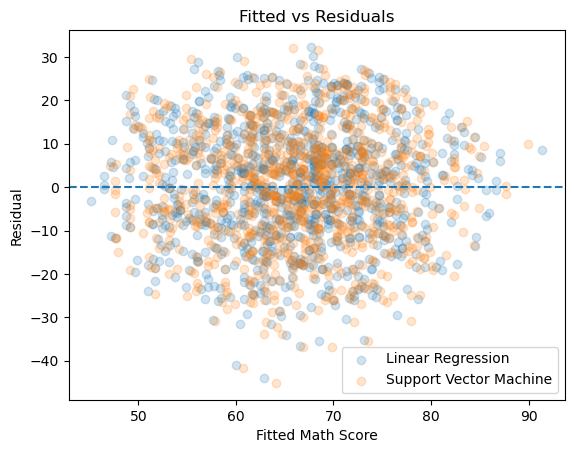

In [29]:
# Number of samples to plot
n = 1000

# Plot the fitted vs residual values for the linear regression model
plt.scatter(lr_predictions[:n], (y_test-lr_predictions)[:n], alpha=0.2)

# Plot the fitted vs residual values for the support vector machine model
plt.scatter(svm_predictions[:n], (y_test-svm_predictions)[:n], alpha=0.2)

# Plot horizontal line at zero
plt.axhline(linestyle="--")

# Plot labels
plt.title("Fitted vs Residuals")
plt.xlabel("Fitted Math Score")
plt.ylabel("Residual")
plt.legend(["Linear Regression", "Support Vector Machine"])

## 4. Evaluate the model

### Coefficient of determination ($R^2$)

In [30]:
# Evaluate the coefficient of determination for the linear regression model
lr_r2 = r2_score(y_test, lr_predictions)
lr_r2

0.27882233650158006

In [31]:
# Evaluate the coefficient of determination for the support vector machine model
svm_r2 = r2_score(y_test, svm_predictions)
svm_r2

0.27141914335691153

### Root mean squared error (RMSE)

In [32]:
# Evaluate the root mean squared error of the linear regression model
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
lr_rmse

12.990889779885013

In [33]:
# Evaluate the root mean squared error of the support vector machine model
svm_rmse = mean_squared_error(y_test, svm_predictions, squared=False)
svm_rmse

13.057398015608193

In [34]:
# Evaluate the root mean squared error of the support vector machine model
svm_rmse = mean_squared_error(y_test, svm_predictions, squared=False)
svm_rmse

13.057398015608193

### Mean absolute error (MAE)

In [35]:
# Evaluate the mean absolute error of the linear regression model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mae

10.522224470459602

In [36]:
# Evaluate the mean absolute error of the support vector machine model
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_mae

10.580280377190652

In [37]:
pd.DataFrame({
    "Model": ["Linear Regression", "Support Vector Machine"],
    "R^2": [lr_r2, svm_r2],
    "RMSE": [lr_rmse, svm_rmse],
    "MAE": [lr_mae, svm_mae]
})

,Model,R^2,RMSE,MAE
0,Linear Regression,0.278822,12.990890,10.522224
1,Support Vector Machine,0.271419,13.057398,10.580280


In [38]:
# Save the linear regression model
pickle.dump(lr_model, open("outputs/lr-model.pkl", "wb"))

# Save the support vector machine model
pickle.dump(svm_model, open("outputs/svm-model.pkl", "wb"))

## 5. Summary